In [5]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("ratings.csv")


In [6]:

# the full data 20ML file's     URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv
# the 1000 sample data file's   URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv
url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv"
df = pd.read_csv(url)

print(df.head(10))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


# Youssef **Ekrami**

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [7]:
# Count unique users manually
unique_users = {}
for row in df['userId']:
    if row not in unique_users:
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)


# Count unique items manually
unique_items = {}
for row in df['movieId']:
    if row not in unique_items:
        unique_items[row] = True
num_items = 0
for _ in unique_items:
    num_items += 1
print("Number of items:", num_items)


# Count ratings manually (without len)
num_ratings = 0
for _ in df['rating']:
    num_ratings += 1
print("Number of ratings:", num_ratings)


Number of users: 7120
Number of items: 14026
Number of ratings: 1048575


### 3. Calculate the number of ratings for each user (nu) and save it


In [9]:
nu = {}  # dictionary: userId -> count

# Loop through each row and count occurrences
for user in df['userId']:
    if user not in nu:
        nu[user] = 1
    else:
        nu[user] += 1

print("\nNumber of ratings per user (nu):")

# print first 5 users manually (not using head)
counter = 0
for user, count in nu.items():
    print(user, ":", count)
    counter += 1
    if counter == 5:
        break



Number of ratings per user (nu):
1 : 175
2 : 61
3 : 187
4 : 28
5 : 66


### 4. Calculate the number of ratings for each item (ni) and save it


In [13]:
# Step 1: Count ratings per item manually
ni = {}
for item in df['movieId']:
    if item not in ni:
        ni[item] = 1
    else:
        ni[item] += 1

# Step 2: Find the smallest movieId each time and print first 5
print("\nNumber of ratings per item (ni):")

printed = 0
used = []  # store printed keys to avoid repetition

while printed < 5:
    smallest = None
    
    # find smallest key not printed yet
    for key in ni:
        if key not in used and (smallest is None or key < smallest):
            smallest = key
    
    print(smallest, ni[smallest])
    used.append(smallest)
    printed += 1



Number of ratings per item (ni):
1 2569
2 1155
3 685
4 138
5 657


### 5. Compute the average ratings per user (ru) and save it


In [20]:
ru = {}      # sum of ratings per user
count = {}   # number of ratings per user

for i in range(len(df['userId'])):
    u = df['userId'][i]
    r = df['rating'][i]
    
    if u in ru:
        ru[u] = ru[u] + r
        count[u] = count[u] + 1
    else:
        ru[u] = r
        count[u] = 1

for u in ru:
    avg = ru[u] / count[u]
    ru[u] = round(avg, 2)   # round to 2 decimals



In [22]:
print("\nAverage ratings per user (ru):")

printed = 0
for u in ru:
    print(u, ":", ru[u])
    printed += 1
    if printed == 10:
        break



Average ratings per user (ru):
1 : 3.74
2 : 4.0
3 : 4.12
4 : 3.57
5 : 4.27
6 : 3.75
7 : 3.29
8 : 3.8
9 : 3.06
10 : 3.89


### 6. Compute the average ratings per item (ri) and save it


In [25]:
# Compute average rating per item (movieId)
ri = {}      # sum of ratings per item
count = {}   # number of ratings per item

for i in range(len(df['movieId'])):
    m = df['movieId'][i]
    r = df['rating'][i]
    
    if m in ri:
        ri[m] = ri[m] + r
        count[m] = count[m] + 1
    else:
        ri[m] = r
        count[m] = 1

for m in ri:
    avg = ri[m] / count[m]
    ri[m] = round(avg, 2)   # round to 2 decimals



In [28]:
print("\nAverage ratings per item (ri):")

printed = 0
for m in ri:
    print(m, ":", ri[m])
    printed += 1
    if printed == 10:
        break



Average ratings per item (ri):
2 : 3.27
29 : 4.0
32 : 3.9
47 : 4.08
50 : 4.37
112 : 3.37
151 : 3.51
223 : 3.88
253 : 3.5
260 : 4.19


### 7. Ascendingly order the total number of ratings per item and plot the distribution per item


Ratings per item sorted ascendingly:
60524 : 1
70227 : 1
59382 : 1
60482 : 1
2489 : 1
6955 : 1
4724 : 1
27359 : 1
27684 : 1
97324 : 1


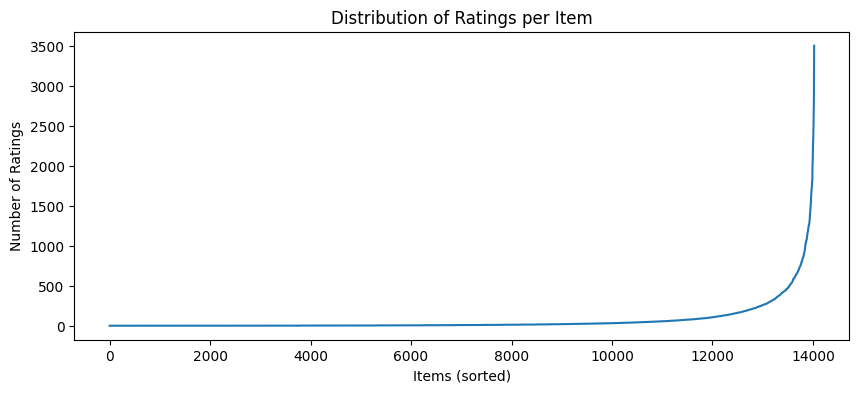

In [34]:
# ni dictionary already exists: movieId -> count

# Convert ni items to list of tuples
ni_items = []
for key in ni:
    ni_items.append((key, ni[key]))

# Merge Sort implementation to sort by count
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        # Compare counts (index 1 in tuple)
        if left[i][1] <= right[j][1]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    # Append leftovers
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result

# Use merge sort
sorted_ni = merge_sort(ni_items)

# Print first 700
print("Ratings per item sorted ascendingly:")
for i in range(min(10, len(sorted_ni))):
    print(sorted_ni[i][0], ":", sorted_ni[i][1])

# Plotting
import matplotlib.pyplot as plt

counts = [item[1] for item in sorted_ni]

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


### 8. Compute number of products based on their average ratings (percentage groups)


In [42]:
### 8. Compute the number of products based on their average ratings in Groups (G1 to G10)

# Initialize empty lists for each group to store the Movie IDs
# G1: <= 1%
# G2: 1% - 5%
# G3: 5% - 10%
# G4: 10% - 20%
# G5: 20% - 30%
# G6: 30% - 40%
# G7: 40% - 50%
# G8: 50% - 60% (Corrected from prompt context)
# G9: 60% - 70%
# G10: 70% - 100%

g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []

# Loop through the Average Ratings dictionary (ri) created in Task 6
for movie_id in ri:
    avg = ri[movie_id]
    
    # Calculate percentage (assuming max rating is 5.0)
    percent = (avg / 5.0) * 100
    
    # Check which group the product belongs to
    if percent <= 1:
        g1.append(movie_id)
    elif percent > 1 and percent <= 5:
        g2.append(movie_id)
    elif percent > 5 and percent <= 10:
        g3.append(movie_id)
    elif percent > 10 and percent <= 20:
        g4.append(movie_id)
    elif percent > 20 and percent <= 30:
        g5.append(movie_id)
    elif percent > 30 and percent <= 40:
        g6.append(movie_id)
    elif percent > 40 and percent <= 50:
        g7.append(movie_id)
    elif percent > 50 and percent <= 60:
        g8.append(movie_id)
    elif percent > 60 and percent <= 70:
        g9.append(movie_id)
    elif percent > 70 and percent <= 100:
        g10.append(movie_id)

# Print the number of products in each group
print("Number of products per group:")
print("G1 (<= 1%):", len(g1))
print("G2 (1-5%):", len(g2))
print("G3 (5-10%):", len(g3))
print("G4 (10-20%):", len(g4))
print("G5 (20-30%):", len(g5))
print("G6 (30-40%):", len(g6))
print("G7 (40-50%):", len(g7))
print("G8 (50-60%):", len(g8))
print("G9 (60-70%):", len(g9))
print("G10 (70-100%):", len(g10))

Number of products per group:
G1 (<= 1%): 0
G2 (1-5%): 0
G3 (5-10%): 183
G4 (10-20%): 195
G5 (20-30%): 260
G6 (30-40%): 605
G7 (40-50%): 1166
G8 (50-60%): 2486
G9 (60-70%): 3890
G10 (70-100%): 5241


G3: 183 
this means that there is 183 product each product of the 183 product its average rating is among the lowest 1% of all products’ average ratings. 

### 9. Compute the total number of ratings in each group and order them ascendingly


In [43]:
### 9. Compute the total number of ratings in each group and order them ascendingly

# Helper function to sum ratings for a list of items
# We use the 'ni' dictionary (number of ratings per item) from Task 4
def get_total_ratings(item_list, ni_dict):
    total = 0
    for movie_id in item_list:
        if movie_id in ni_dict:
            total = total + ni_dict[movie_id]
    return total

# Calculate totals for each group
t1 = get_total_ratings(g1, ni)
t2 = get_total_ratings(g2, ni)
t3 = get_total_ratings(g3, ni)
t4 = get_total_ratings(g4, ni)
t5 = get_total_ratings(g5, ni)
t6 = get_total_ratings(g6, ni)
t7 = get_total_ratings(g7, ni)
t8 = get_total_ratings(g8, ni)
t9 = get_total_ratings(g9, ni)
t10 = get_total_ratings(g10, ni)

# Create a list of lists to store [GroupName, TotalCount]
# This is our dataset to sort
group_data = [
    ["G1", t1], ["G2", t2], ["G3", t3], ["G4", t4], 
    ["G5", t5], ["G6", t6], ["G7", t7], ["G8", t8], 
    ["G9", t9], ["G10", t10]
]

# QuickSort Implementation (Best algorithm for time complexity O(n log n))
def quick_sort(arr):
    # Base case: if list is empty or has 1 item, it's already sorted
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2] # Choose middle element as pivot
    left = []
    middle = []
    right = []
    
    for x in arr:
        # Compare the count (index 1 of the inner list)
        if x[1] < pivot[1]:
            left.append(x)
        elif x[1] == pivot[1]:
            middle.append(x)
        else:
            right.append(x)
            
    # Recursive calls
    return quick_sort(left) + middle + quick_sort(right)

# Perform the sort
sorted_groups = quick_sort(group_data)

print("\nTotal ratings per group (Sorted Ascendingly):")
for item in sorted_groups:
    print(item[0], ":", item[1])


Total ratings per group (Sorted Ascendingly):
G1 : 0
G2 : 0
G3 : 201
G4 : 404
G5 : 1146
G6 : 7503
G7 : 27018
G8 : 114549
G9 : 290357
G10 : 607397


### 10. Plot the distribution before and after ordering


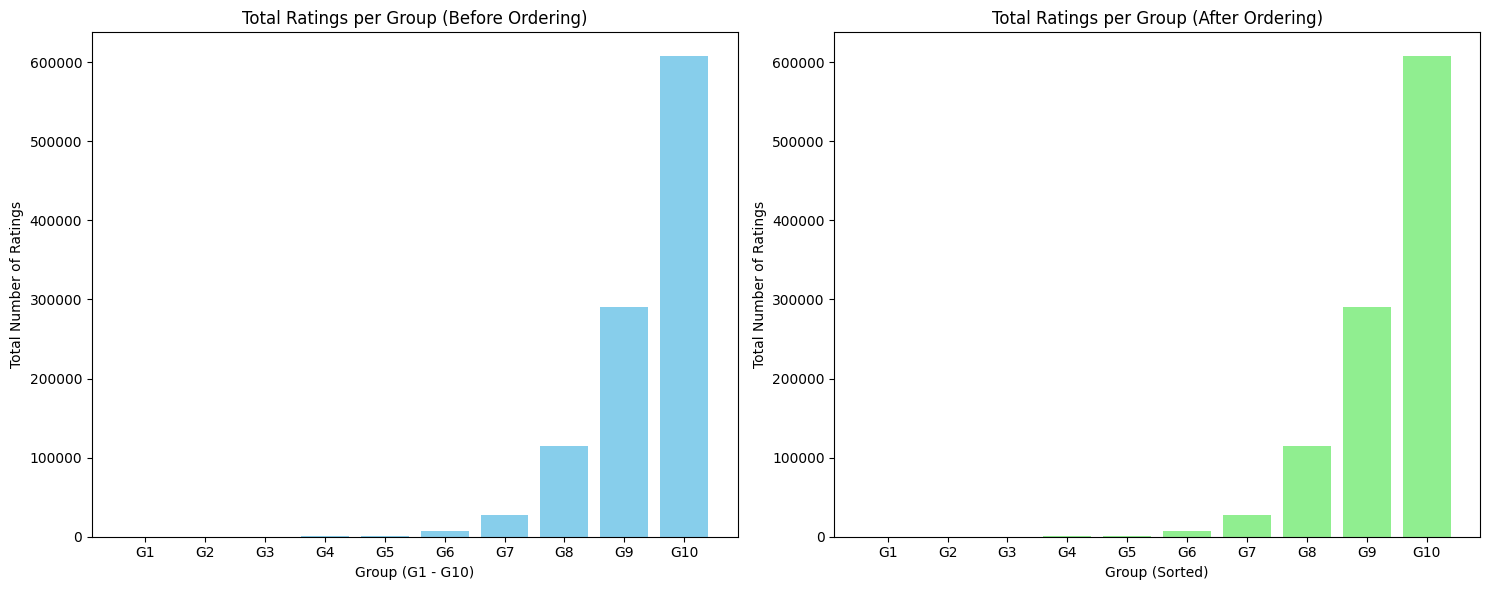

In [44]:
import matplotlib.pyplot as plt

# --- Prepare Data for Plotting ---

# 1. Before Ordering:
# We strictly follow the group order G1 to G10
labels_before = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
# Map the group names to their totals calculated in Task 9
values_before = [
    get_total_ratings(g1, ni), get_total_ratings(g2, ni), 
    get_total_ratings(g3, ni), get_total_ratings(g4, ni),
    get_total_ratings(g5, ni), get_total_ratings(g6, ni), 
    get_total_ratings(g7, ni), get_total_ratings(g8, ni), 
    get_total_ratings(g9, ni), get_total_ratings(g10, ni)
]

# 2. After Ordering:
# We use the sorted_groups list we created in Task 9 using QuickSort
# sorted_groups structure is [['G_name', Total], ...]
labels_after = []
values_after = []

for item in sorted_groups:
    labels_after.append(item[0])
    values_after.append(item[1])

# --- Plotting ---

plt.figure(figsize=(15, 6))

# Subplot 1: Before Ordering
plt.subplot(1, 2, 1)
plt.bar(labels_before, values_before, color='skyblue')
plt.title("Total Ratings per Group (Before Ordering)")
plt.xlabel("Group (G1 - G10)")
plt.ylabel("Total Number of Ratings")

# Subplot 2: After Ordering (Ascending)
plt.subplot(1, 2, 2)
plt.bar(labels_after, values_after, color='lightgreen')
plt.title("Total Ratings per Group (After Ordering)")
plt.xlabel("Group (Sorted)")
plt.ylabel("Total Number of Ratings")

plt.tight_layout()
plt.show()

### 11. Select three target users based on their rating percentage


In [99]:

total_movies = df['movieId'].nunique()
user_rating_counts = df.groupby('userId').size()
user_percentage = (user_rating_counts / total_movies) * 100

# Find users in each required band
U1_cands = user_percentage[user_percentage <= 2]
U2_cands = user_percentage[(user_percentage > 2) & (user_percentage <= 5)]
U3_cands = user_percentage[(user_percentage > 5) & (user_percentage <= 10)]

# Pick one user from each (first one found)
U1 = U1_cands.index[0]
U2 = U2_cands.index[0] if len(U2_cands) > 0 else U1_cands.index[-1]  # fallback just in case
U3 = U3_cands.index[0] if len(U3_cands) > 0 else U2_cands.index[-1]

print("\n11. Selected Target Users:")
print(f"U1 (≤2% of movies rated)    → {U1} | rated {user_rating_counts[U1]} movies ({user_percentage[U1]:.4f}%)")
print(f"U2 (>2% ≤5%)                → {U2} | rated {user_rating_counts[U2]} movies ({user_percentage[U2]:.4f}%)")
print(f"U3 (>5% ≤10%)               → {U3} | rated {user_rating_counts[U3]} movies ({user_percentage[U3]:.4f}%)")

# Save for later use
target_users = [U1, U2, U3]
print("\nTarget users saved → you can now use them for recommendation experiments!")


11. Selected Target Users:
U1 (≤2% of movies rated)    → 1 | rated 175 movies (1.2477%)
U2 (>2% ≤5%)                → 11 | rated 504 movies (3.5933%)
U3 (>5% ≤10%)               → 54 | rated 710 movies (5.0620%)

Target users saved → you can now use them for recommendation experiments!


# Dareen Mosa

# dareen MOSA

# LALALA

# Seif Samer

Import Libraries & Overview of Dataset

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming df is already loaded
# df contains columns: userId, movieId, rating, timestamp

print("Dataset Overview:")
print(df.head())
print("\nNumber of users:", df['userId'].nunique())
print("Number of movies:", df['movieId'].nunique())
print("Total ratings:", len(df))


Dataset Overview:
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

Number of users: 7120
Number of movies: 14026
Total ratings: 1048575


Compute Number of Raters and Average Rating per Movie

In [101]:
# Number of ratings per movie
ni = df.groupby('movieId').size()

# Average rating per movie
average_ri = df.groupby('movieId')['rating'].mean()

# Merge into a single DataFrame for clustering
movie_stats = pd.DataFrame({
    "movieId": average_ri.index,
    "num_raters": ni.values,
    "avg_rating": average_ri.values
})

print("First 5 movies with their statistics:")
print(movie_stats.head())


First 5 movies with their statistics:
   movieId  num_raters  avg_rating
0        1        2569    3.959323
1        2        1155    3.268398
2        3         685    3.186861
3        4         138    3.000000
4        5         657    3.143836


Scale Features for K-Means (part 3)

In [102]:
# Initialize scalers
scaler_raters = StandardScaler()
scaler_rating = StandardScaler()

# Scale features
movie_stats["num_raters_scaled"] = scaler_raters.fit_transform(movie_stats[["num_raters"]])
movie_stats["avg_rating_scaled"] = scaler_rating.fit_transform(movie_stats[["avg_rating"]])

# Log-transform and scale
movie_stats["num_raters_log"] = np.log1p(movie_stats["num_raters"])
movie_stats["num_raters_log_scaled"] = scaler_raters.fit_transform(movie_stats[["num_raters_log"]])


Find Optimal Number of Clusters (part 3)
Using Elbow Method and Silhouette Score

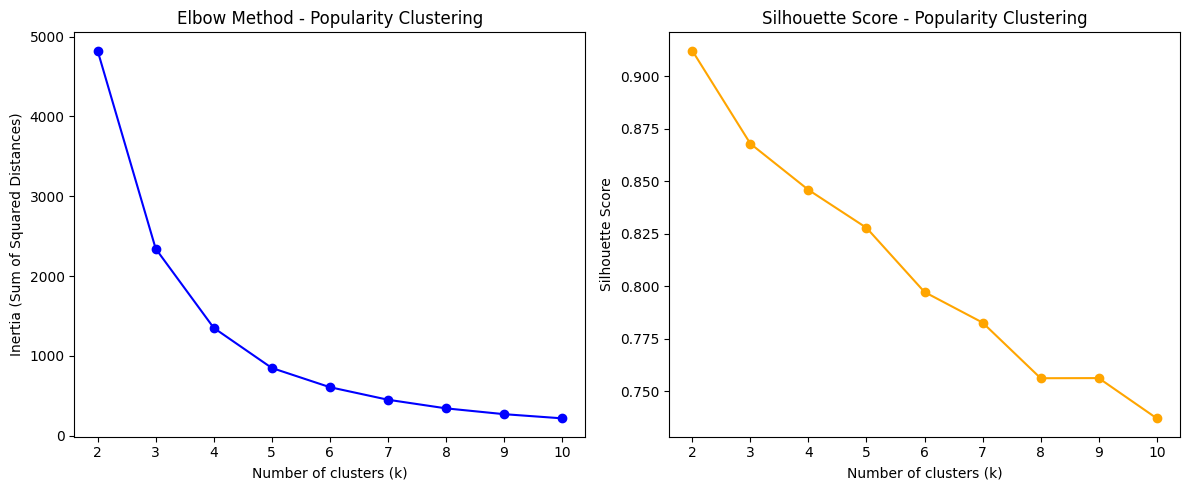

Optimal number of clusters based on silhouette score: 2


In [103]:


X_pop = movie_stats[["num_raters_scaled"]]  # popularity clustering

# Try k from 2 to 10
K_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pop)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pop, labels))

# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title("Elbow Method - Popularity Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'o-', color='orange')
plt.title("Silhouette Score - Popularity Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Determine best k based on silhouette score
best_k_pop = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k_pop}")


Apply K-Means Clustering for Popularity (part 3)

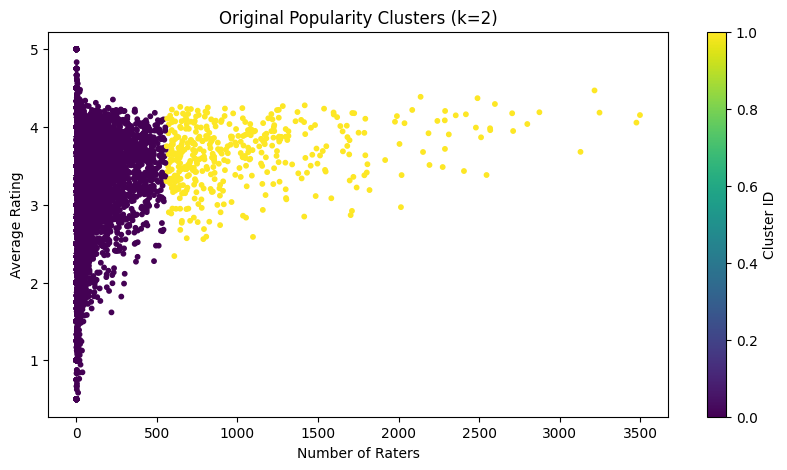

In [104]:


X_orig = movie_stats[["num_raters_scaled"]]
kmeans_orig = KMeans(n_clusters=best_k_pop, random_state=42, n_init=40)
movie_stats["pop_cluster_orig"] = kmeans_orig.fit_predict(X_orig)

# Log-transformed popularity clustering
X_log = movie_stats[["num_raters_log_scaled"]]
kmeans_log = KMeans(n_clusters=best_k_log, random_state=42, n_init=40)
movie_stats["pop_cluster_log"] = kmeans_log.fit_predict(X_log)


plt.figure(figsize=(10,5))
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["pop_cluster_orig"],  # updated column name
    cmap="viridis",
    s=10
)
plt.title(f"Original Popularity Clusters (k={best_k_pop})")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")
plt.show()



Log Transform Number of Raters

In [105]:

import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log1p transformation to compress high values
movie_stats["num_raters_log"] = np.log1p(movie_stats["num_raters"])

# Scale the transformed feature for K-Means
scaler = StandardScaler()
movie_stats["num_raters_log_scaled"] = scaler.fit_transform(movie_stats[["num_raters_log"]])

print("Log transformation and scaling applied:")
print(movie_stats[["movieId", "num_raters", "num_raters_log", "num_raters_log_scaled"]].head())


Log transformation and scaling applied:
   movieId  num_raters  num_raters_log  num_raters_log_scaled
0        1        2569        7.851661               3.060434
1        2        1155        7.052721               2.590718
2        3         685        6.530878               2.283914
3        4         138        4.934474               1.345350
4        5         657        6.489205               2.259414


Find Optimal Number of Clusters (Elbow & Silhouette)

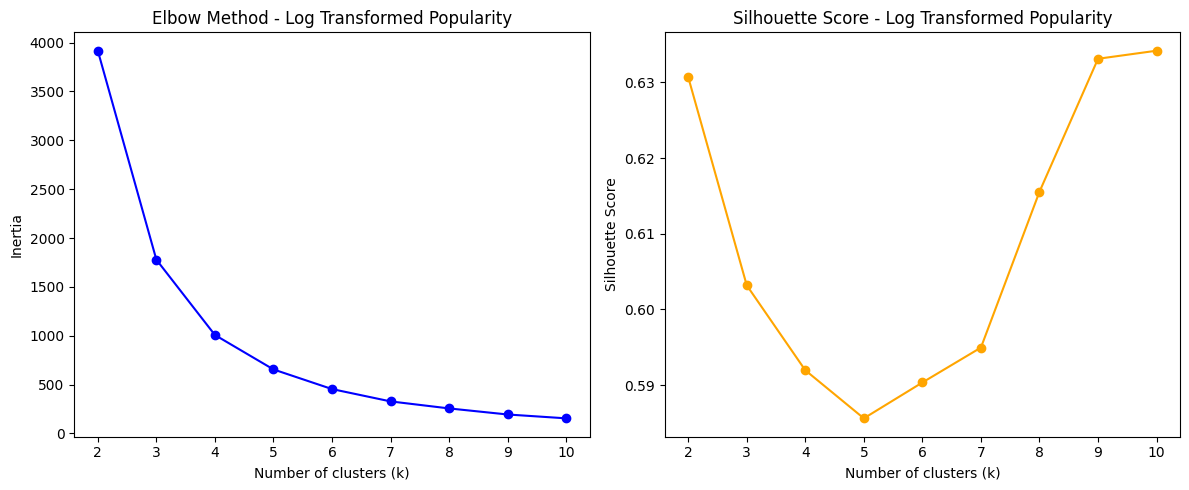

Optimal number of clusters after log transform: 10


In [106]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_log = movie_stats[["num_raters_log_scaled"]]

K_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_log)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_log, labels))

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title("Elbow Method - Log Transformed Popularity")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'o-', color='orange')
plt.title("Silhouette Score - Log Transformed Popularity")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Best k based on silhouette
best_k_log = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters after log transform: {best_k_log}")


Apply K-Means Clustering (log)

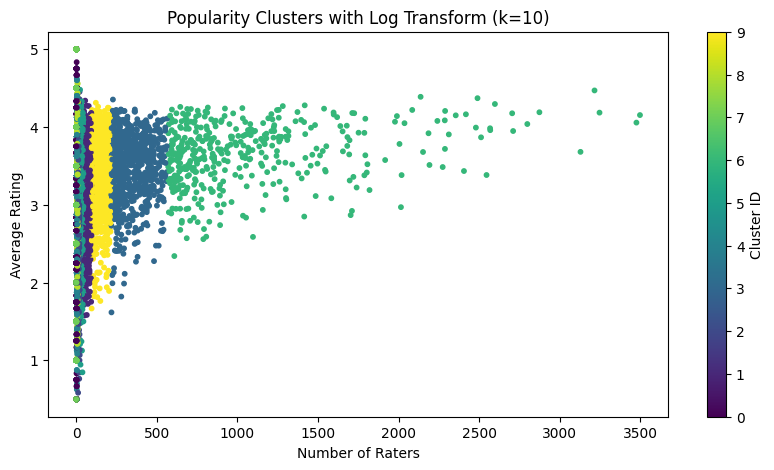

In [107]:
# ------------------------------------------------------------
# Cell 3: Apply K-Means Clustering
# ------------------------------------------------------------
kmeans_log = KMeans(n_clusters=best_k_log, n_init=40, random_state=42)
movie_stats["popularity_cluster_log"] = kmeans_log.fit_predict(X_log)

# Visualize clusters
plt.figure(figsize=(10,5))
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_log"],
    cmap="viridis",
    s=10
)
plt.title(f"Popularity Clusters with Log Transform (k={best_k_log})")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")
plt.show()


Visual Comparison (Original vs Log)

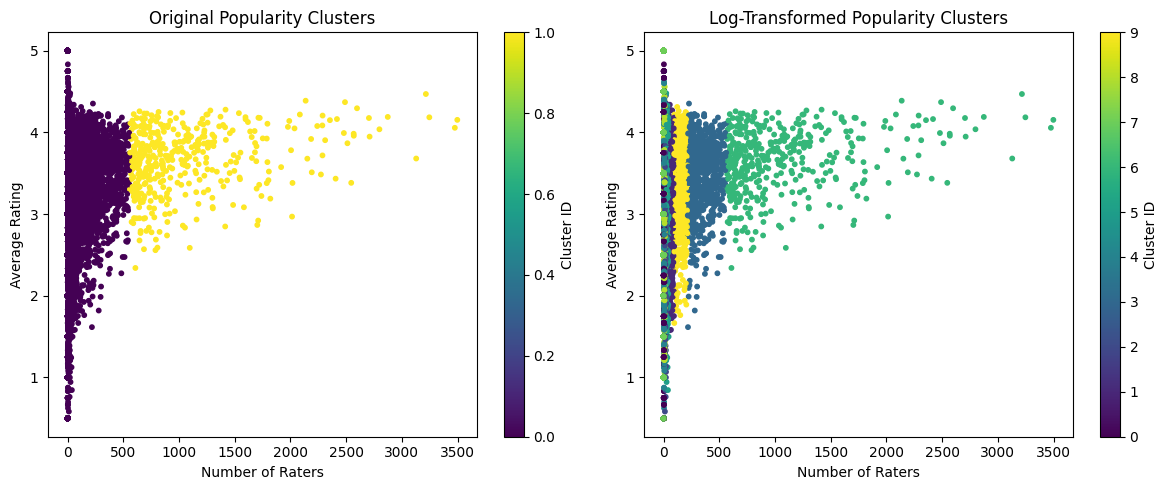

In [108]:

kmeans_orig = KMeans(n_clusters=best_k_pop, n_init=40, random_state=42)
movie_stats["popularity_cluster_orig"] = kmeans_orig.fit_predict(movie_stats[["num_raters_scaled"]])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_orig"],
    cmap="viridis",
    s=10
)
plt.title("Original Popularity Clusters")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")

plt.subplot(1,2,2)
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_log"],
    cmap="viridis",
    s=10
)
plt.title("Log-Transformed Popularity Clusters")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")

plt.tight_layout()
plt.show()


Identify Cold-Start Movies (Few Ratings) (part 4)

In [109]:


COLD_THRESHOLD = 5
cold_start_movies = movie_stats[movie_stats["num_raters"] <= COLD_THRESHOLD]

print(f"Number of cold-start movies (≤ {COLD_THRESHOLD} ratings): {len(cold_start_movies)}")


Number of cold-start movies (≤ 5 ratings): 5795


Optimal Clusters for Cold-Start Movies (part 4)

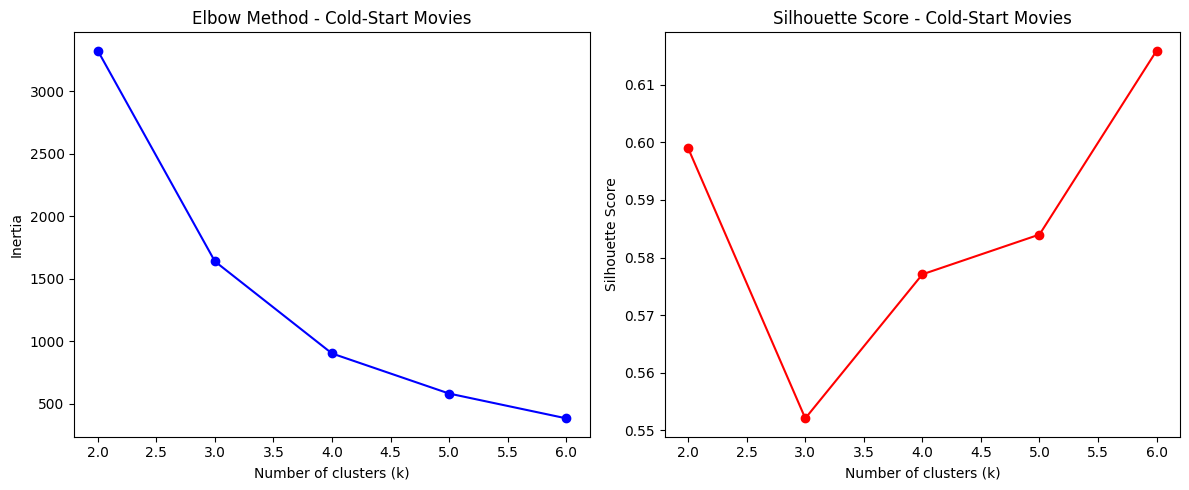

Optimal number of clusters for cold-start movies: 6


In [110]:


if len(cold_start_movies) > 0:
    X_cold = cold_start_movies[["avg_rating_scaled"]]
    K_range_cold = range(2, 7)
    inertia_cold = []
    silhouette_cold = []

    for k in K_range_cold:
        km = KMeans(n_clusters=k, n_init=20, random_state=42)
        labels = km.fit_predict(X_cold)
        inertia_cold.append(km.inertia_)
        silhouette_cold.append(silhouette_score(X_cold, labels))

    # Plot Elbow and Silhouette for cold-start
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(K_range_cold, inertia_cold, 'o-', color='blue')
    plt.title("Elbow Method - Cold-Start Movies")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")

    plt.subplot(1,2,2)
    plt.plot(K_range_cold, silhouette_cold, 'o-', color='red')
    plt.title("Silhouette Score - Cold-Start Movies")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")

    plt.tight_layout()
    plt.show()

    best_k_cold = K_range_cold[np.argmax(silhouette_cold)]
    print(f"Optimal number of clusters for cold-start movies: {best_k_cold}")

else:
    print("No cold-start movies found. Increase threshold if needed.")


Apply K-Means for Cold-Start Movies (part 4)

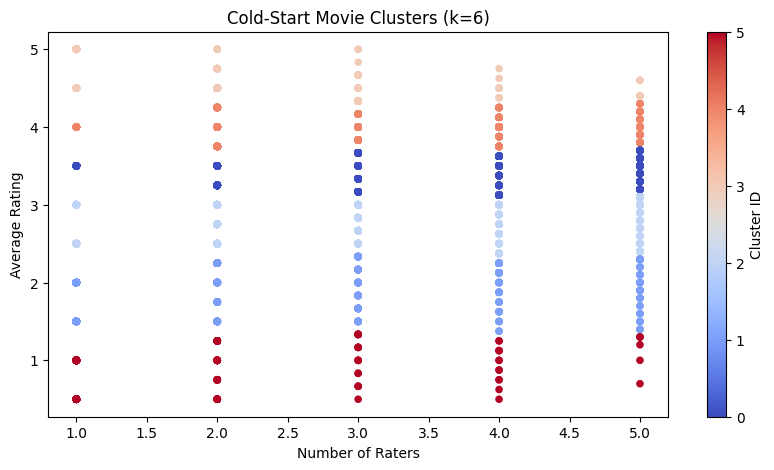

In [111]:


if len(cold_start_movies) > 0:
    kmeans_cold = KMeans(n_clusters=best_k_cold, n_init=40, random_state=42)
    cold_start_movies["cold_cluster"] = kmeans_cold.fit_predict(X_cold)

    # Visualize cold-start clusters
    plt.figure(figsize=(10,5))
    plt.scatter(
        cold_start_movies["num_raters"],
        cold_start_movies["avg_rating"],
        c=cold_start_movies["cold_cluster"],
        cmap="coolwarm",
        s=20
    )
    plt.title(f"Cold-Start Movie Clusters (k={best_k_cold})")
    plt.xlabel("Number of Raters")
    plt.ylabel("Average Rating")
    plt.colorbar(label="Cluster ID")
    plt.show()
